In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import matplotlib.pyplot as plt
import pybullet as p
import numpy.matlib
from IPython.core import display
import scipy
import scipy.stats
from IPython.display import clear_output
%matplotlib inline

In [2]:
def define_RBF(dof=39, nbStates=60, offset=5, width=1.5, T=100, coeff = 250):
    tList = np.arange(T)

    Mu = np.linspace(tList[0]-offset, tList[-1]+offset, nbStates)
    Sigma  = np.reshape(np.matlib.repmat(width, 1, nbStates),[1, 1, nbStates])
    Sigma.shape
    Phi = np.zeros((T, nbStates))
    for i in range(nbStates):
        Phi[:,i] = coeff*scipy.stats.norm(Mu[i], Sigma[0,0,i]).pdf(tList)
    print (Phi)
    return Phi

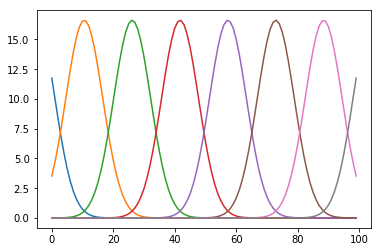

In [7]:
Phi = define_RBF(nbStates=8, width=6)
clear_output()
plt.plot(Phi)
plt.show()

In [8]:
np.savetxt("data/rbf.txt",Phi)